In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def convert_dollars_2022(dollars):
    # According to https://www.officialdata.org/us/inflation/1990?endYear=2022&amount=1
    conversion = 2.24
    return dollars * conversion


In [12]:
cali_house_prices = pd.read_csv("data/california_housing_prices.csv")

cali_house_prices.drop(["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "ocean_proximity"], axis=1, inplace=True)
cali_house_prices.rename(columns={
    "median_house_value": "value"
}, inplace=True)

# median_income is initially measured in 10s of thousands of dollars, convert to dollars
cali_house_prices["median_income"] = cali_house_prices["median_income"] * 10000

# Account for inflation and convert to 2022 dollars
cali_house_prices["median_income"] = cali_house_prices["median_income"].apply(convert_dollars_2022)
cali_house_prices["value"] = cali_house_prices["value"].apply(convert_dollars_2022)

cali_house_prices

,median_income,value
0,186484.48,1013824.0
1,185951.36,803040.0
2,162565.76,788704.0
3,126405.44,764512.0
4,86154.88,766528.0
...,...,...
20635,34950.72,174944.0
20636,57272.32,172704.0
20637,38080.00,206752.0
20638,41825.28,189728.0


In [13]:
cali_house_prices.describe()

,median_income,value
count,20640.000000,2.064000e+04
mean,86703.030465,4.633570e+05
std,42556.006482,2.584862e+05
min,11197.760000,3.359776e+04
25%,57420.160000,2.679040e+05
50%,79179.520000,4.025280e+05
75%,106248.800000,5.929840e+05
max,336002.240000,1.120002e+06


In [14]:
us_re_interest_rates = pd.read_csv("data/us_real_estate_interest_rates.csv")

us_re_interest_rates.drop(["FEDFUNDS", "Owner-Occupied-Home-Proportion", "Year", "Month", "Quarter", "Region", "Home Size", "Number of Households (Thousands)", "Median Income - Current Dollars", "Mean Income - Current Dollars", "Year-Quarter-Month", "Mean Income - 2022 Dollars"], axis=1, inplace=True)
us_re_interest_rates.rename(columns={
    "30-Year-Mortgage-Rate": "mortgage_rate",
    "Consumer-Price-Index": "consumer_price_index",
    "Average Sales Price": "value",
    "Median Income - 2022 Dollars": "median_income"
}, inplace=True)

# reorder columns to match cali_house_prices
us_re_reordering = ["median_income", "value", "mortgage_rate", "consumer_price_index"]
us_re_interest_rates = us_re_interest_rates[us_re_reordering]

us_re_interest_rates

,median_income,value,mortgage_rate,consumer_price_index
0,65640.0,88200.0,4.432,235.288
1,65640.0,51400.0,4.432,235.288
2,65640.0,72000.0,4.432,235.288
3,71620.0,92600.0,4.432,235.288
4,71620.0,48700.0,4.432,235.288
...,...,...,...,...
1570,74580.0,80200.0,6.364,298.812
1571,74580.0,122100.0,6.364,298.812
1572,82890.0,162400.0,6.364,298.812
1573,82890.0,77600.0,6.364,298.812


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\East\\School\\CS-577\\ir-ho-relationships\\images\\median-income-value.png'

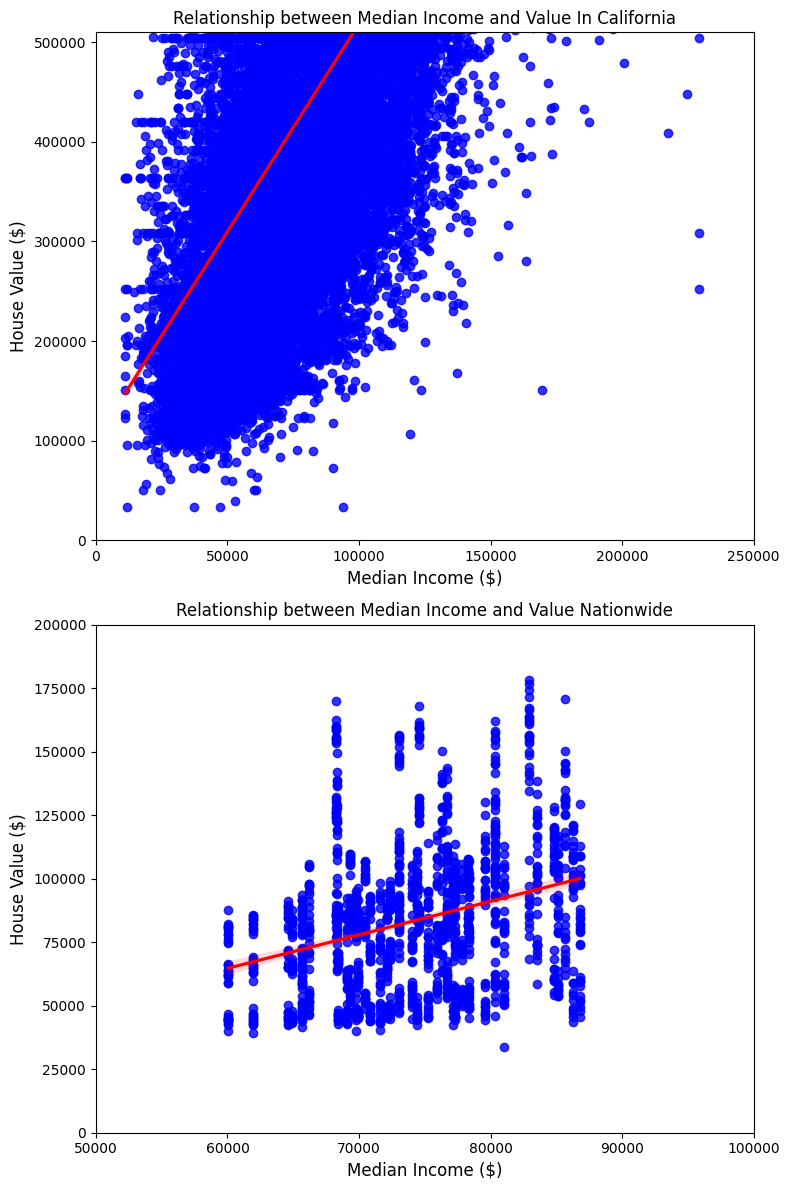

In [19]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(8, 12))
                     

# First subplot
plt.subplot(2, 1, 1)  # (rows, columns, index)
sns.regplot(data=cali_house_prices, x='median_income', y='value', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.ticklabel_format(style='plain', axis='x')
plt.title('Relationship between Median Income and Value In California')
plt.xlabel('Median Income ($)', fontsize=12)  # Customize x-axis label
plt.ylabel('House Value ($)', fontsize=12)  # Customize y-axis label
                     
plt.xlim(0, 250000)
plt.ylim(0, 510000)

# Second subplot
plt.subplot(2, 1, 2)  # (rows, columns, index)
sns.regplot(data=us_re_interest_rates, x='median_income', y='value', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship between Median Income and Value Nationwide')
plt.xlabel('Median Income ($)', fontsize=12)  # Customize x-axis label
plt.ylabel('House Value ($)', fontsize=12)  # Customize y-axis label

plt.xlim(50000, 100000)
plt.ylim(0, 200000)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('images/median-income-value.png')

# Display the plot
plt.show()